# NLP Gen AI Project: Exploring Islamic Teachings(FikrFlow)

![Islamic Knowledge](pic1.webp)

Welcome to our **Advanced RAG with Groq (Custom Pipeline)**, where we blend modern artificial intelligence with the timeless wisdom of the Quran and Hadith. This project is designed to help users explore and understand Islamic teachings through insightful, AI-generated explanations.

---

**What We Do:**

- **Deep Understanding:** Analyze your questions with advanced NLP techniques.
- **Authentic Sources:** Retrieve relevant insights from the Quran and Hadith.
- **Clear Explanations:** Generate easy-to-understand responses that bridge tradition and technology.

> **Disclaimer:**  
> The interpretations provided by this project are generated for educational purposes. For authoritative guidance, please consult knowledgeable scholars.

Explore, learn, and experience the convergence of technology and tradition!


## Cell 1: Environment Setup

In [32]:
%%capture
# Upgrade pip and install required packages
!pip install --upgrade pip

# Core libraries
!pip install pandas matplotlib nltk spacy langchain chromadb sentence-transformers groq pydantic wordcloud umap-learn scikit-learn tqdm

# SpaCy models (if you want advanced sentence segmentation in chunking)
!python -m spacy download en_core_web_sm
!python -m spacy download xx_ent_wiki_sm  # for multilingual sentence segmentation if needed

In [50]:
!pip install tabulate
!pip install rich

## Information About csv

In [71]:
from rich.console import Console
from rich.table import Table
import pandas as pd

# Optionally, set a wider console width
console = Console(width=240)

df = pd.read_csv('csv_files_info.csv')

# Create a table that expands to the console width with horizontal lines
table = Table(show_header=True, header_style="bold magenta", show_lines=True, expand=True)

# Increase min_width and disable wrapping for each column
for col in df.columns:
    table.add_column(col)

# Add rows to the table
for _, row in df.head(50).iterrows():
    table.add_row(*[str(item) for item in row])

console.print(table)


┏━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ No ┃ File Name                                                                   ┃ Full Path                                                                   ┃ Header                                                                      ┃
┡━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 1  │ Abdullah_Yusuf_Ali_translation.csv                                          │ D:\Project\Training\Tro1\NLP Quran                                          │ Name, Surah, Ayat, Verse                                                    │
│    │                                                                             │ project\data\Abdullah_Yusuf_Ali_translation.csv                             │                                                                             │
├────┼─────────────────────────────────────────────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────┤
│ 2  │ AlAmali_TheDictations__ShaykhMuhammadbAlialSaduq.csv                        │ D:\Project\Training\Tro1\NLP Quran                                          │ title, title_en, volume, author, translator, description, book, chapter,    │
│    │                                                                             │ project\data\AlAmali_TheDictations__ShaykhMuhammadbAlialSaduq.csv           │ hadees_number, hadees_arabic, hadees_english                                │
├────┼─────────────────────────────────────────────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────┤
│ 3  │ AlAmali_TheDictations__ShaykhMuhammadbMuhammadalMufid.csv                   │ D:\Project\Training\Tro1\NLP Quran                                          │ title, title_en, volume, author, translator, description, book, chapter,    │
│    │                                                                             │ project\data\AlAmali_TheDictations__ShaykhMuhammadbMuhammadalMufid.csv      │ hadees_number, hadees_arabic, hadees_english                                │
├────┼─────────────────────────────────────────────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────┤
│ 4  │ AlKafi_TheSufficient_Volume1_ShaykhMuhammadbYaqubalKulayni.csv              │ D:\Project\Training\Tro1\NLP Quran                                          │ title, title_en, volume, author, translator, description, book, chapter,    │
│    │                                                                             │ project\data\AlKafi_TheSufficient_Volume1_ShaykhMuhammadbYaqubalKulayni.csv │ hadees_number, hadees_arabic, hadees_english                                │
├────┼─────────────────────────────────────────────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────┤
│ 5  │ AlKafi_TheSufficient_Volume2_ShaykhMuhammadbYaqubalKulayni.csv              │ D:\Project\Training\Tro1\NLP Quran                                          │ title, title_en, volume, author, translator, description, book, chapter,    │
│    │                                                                             │ project\data\AlKafi_TheSufficient_Volume2_ShaykhMuhammadbYa

## Merginig different csv's to single Jonsl file

In [ ]:
import pandas as pd
import chardet
import json
import os

###############################################################################
# 1) DEFINE ALL 48 FILES
###############################################################################
ALL_FILES = [
    "Abdullah_Yusuf_Ali_translation.csv",
    "AlAmali_TheDictations__ShaykhMuhammadbAlialSaduq.csv",
    "AlAmali_TheDictations__ShaykhMuhammadbMuhammadalMufid.csv",
    "AlKafi_TheSufficient_Volume1_ShaykhMuhammadbYaqubalKulayni.csv",
    "AlKafi_TheSufficient_Volume2_ShaykhMuhammadbYaqubalKulayni.csv",
    "AlKafi_TheSufficient_Volume3_ShaykhMuhammadbYaqubalKulayni.csv",
    "AlKafi_TheSufficient_Volume4_ShaykhMuhammadbYaqubalKulayni.csv",
    "AlKafi_TheSufficient_Volume5_ShaykhMuhammadbYaqubalKulayni.csv",
    "AlKafi_TheSufficient_Volume6_ShaykhMuhammadbYaqubalKulayni.csv",
    "AlKafi_TheSufficient_Volume7_ShaykhMuhammadbYaqubalKulayni.csv",
    "AlKafi_TheSufficient_Volume8_ShaykhMuhammadbYaqubalKulayni.csv",
    "AlKhisal_TheBookofCharacteristics__ShaykhMuhammadbAlialSaduq.csv",
    "AlTawhid_TheBookofDivineUnity__ShaykhMuhammadbAlialSaduq.csv",
    "Al_Qushairi_Tafsir_tafseer.csv",
    "Arthur_J._Arberry_translation.csv",
    "Asma_ul_Husna.csv",
    "csv_files_info.csv",
    "FadailalShia_VirtuesoftheShia__ShaykhMuhammadbAlialSaduq.csv",
    "kaggle_hadiths_clean.csv",
    "kaggle_rawis.csv",
    "KamilalZiyarat_TheCompletePilgrimageGuide__ShaykhJafarbMuhammadalQummi.csv",
    "Kashani_Tafsir_tafseer.csv",
    "KitabalDuafa_TheWeakenedOnes__AbualHusaynAhmadbalHusaynalGhadairi.csv",
    "KitabalGhayba_TheBookofOccultation__AbuAbdAllahMuhammadbIbrahimalNumani.csv",
    "KitabalGhayba_TheBookofOccultation__ShaykhMuhammadbalHasanalTusi.csv",
    "KitabalMumin_TheBookoftheBeliever__HusaynbSaidalAhwazi.csv",
    "KitabalZuhd_TheBookofAsceticism__HusaynbSaidalAhwazi.csv",
    "MaanialAkhbar_TheMeaningsofReports__ShaykhMuhammadbAlialSaduq.csv",
    "main_df.csv",
    "Marmaduke_Pickthall_translation.csv",
    "Martin_Lings_translation.csv",
    "Muhammad_Asad_translation.csv",
    "Muhammad_Tahir-ul-Qadri_translation.csv",
    "MujamalAhadithalMutabara_AComprehensiveCompilationofReliableNarrations__ShaykhMuhammadAsifalMuhsini.csv",
    "NahjalBalagha_ThePeakofEloquence__alSharifalRadi.csv",
    "Recitations_of_Ibrahim_walk_from_saheeh_international_translation.csv",
    "RisalatalHuquq_TreatiseofRights__attributedtoImamZaynalAbidinas.csv",
    "Royal_Aal_al-Bayt_Institute_Translation_translation.csv",
    "SifatalShia_AttributesoftheShia__ShaykhMuhammadbAlialSaduq.csv",
    "surah_info.csv",
    "Tafsir_al-Jalalayn_tafseer.csv",
    "Tanwir_al-Miqbas_min_Tafsir_Ibn_Abbas_tafseer.csv",
    "ThawabalAmalwaiqabalAmal_TheRewardsPunishmentsofDeeds__ShaykhMuhammadbAlialSaduq.csv",
    "The Quran Dataset.csv",
    "translated_samples.csv",
    "UyunakhbaralRida_TheSourceofTraditionsonImamalRida_Volume1_ShaykhMuhammadbAlialSaduq.csv",
    "UyunakhbaralRida_TheSourceofTraditionsonImamalRida_Volume2_ShaykhMuhammadbAlialSaduq.csv"
]

# Path to your folder containing the CSVs
DATA_FOLDER = r"D:\Project\Training\Tro1\NLP Quran project\data"

# Output JSONL file
OUTPUT_JSONL = "combined_llama_dataset.jsonl"


###############################################################################
# 2) UTILITY: READ A CSV WITH ENCODING DETECTION (FOR ENGLISH.CSV) OR UTF-8
###############################################################################
def read_csv_with_possible_detection(file_path: str):
    """
    - Tries reading with UTF-8 first.
    - If there's an error and filename is 'English.csv', tries chardet-based detection.
    - Otherwise tries fallback encodings.
    """
    # If it's specifically the 'English.csv', we suspect encoding issues
    if os.path.basename(file_path) == "English.csv":
        # Try chardet
        with open(file_path, 'rb') as f:
            raw_data = f.read()
            result = chardet.detect(raw_data)
            encoding = result['encoding']
        print(f"[*] Detected encoding for English.csv: {encoding}")
        return pd.read_csv(file_path, encoding=encoding, on_bad_lines='skip')
    else:
        # For other files, try UTF-8; if fail, fallback to 'latin-1'
        try:
            return pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip')
        except UnicodeDecodeError:
            return pd.read_csv(file_path, encoding='latin-1', on_bad_lines='skip')


###############################################################################
# 3) UTILITY: BUILD TEXT SNIPPET BASED ON COMMON HEADERS
###############################################################################
def build_text_snippet(row, source_file, columns):
    """
    Creates a text snippet from a single row (Series), based on known column patterns.
    If there's no recognized pattern, it falls back to concatenating all columns.
    """

    # Convert columns to a set for easy "in" checks
    col_set = set(columns)

    # --- QURAN TRANSLATIONS (Surah, Ayat, Verse) ---
    if {"Surah", "Ayat", "Verse"}.issubset(col_set):
        surah = row.get("Surah", "")
        ayat = row.get("Ayat", "")
        verse = row.get("Verse", "")
        snippet = f"[Quran Translation]\nSurah {surah}, Ayah {ayat}:\n{verse}"

    # --- HADITH / NARRATIONS (hadees_arabic, hadees_english) ---
    elif {"hadees_arabic", "hadees_english"}.issubset(col_set):
        ar = row.get("hadees_arabic", "")
        en = row.get("hadees_english", "")
        snippet = (
            f"[Hadith]\nArabic: {ar}\nEnglish Translation: {en}"
        )

    # --- TAFSIR (Arabic, Tafseer) ---
    elif {"Arabic", "Tafseer"}.issubset(col_set):
        arabic_text = row.get("Arabic", "")
        tafsir_text = row.get("Tafseer", "")
        snippet = f"[Tafsir]\nArabic: {arabic_text}\nExplanation: {tafsir_text}"

    # --- ASMA_UL_HUSNA (Example) ---
    elif {"Arabic Name", "Name in English", "Name Meaning"}.issubset(col_set):
        ar_name = row.get("Arabic Name", "")
        en_name = row.get("Name in English", "")
        meaning = row.get("Name Meaning", "")
        snippet = f"[Asma ul Husna]\nArabic Name: {ar_name}\nEnglish: {en_name}\nMeaning: {meaning}"

    # --- THE QURAN DATASET (Example columns) ---
    elif {"surah_no", "surah_name_en", "ayah_ar", "ayah_en"}.issubset(col_set):
        surah_no = row.get("surah_no", "")
        surah_name = row.get("surah_name_en", "")
        ayah_ar = row.get("ayah_ar", "")
        ayah_en = row.get("ayah_en", "")
        snippet = (
            f"[Quran Data]\nSurah No: {surah_no}, Name: {surah_name}\n"
            f"Arabic: {ayah_ar}\nEnglish: {ayah_en}"
        )

    # --- KAGGLE HADITHS (id, text_ar, text_en) ---
    elif {"id", "text_ar", "text_en"}.issubset(col_set):
        hadith_id = row.get("id", "")
        text_ar = row.get("text_ar", "")
        text_en = row.get("text_en", "")
        snippet = f"[Kaggle Hadith]\nID: {hadith_id}\nArabic: {text_ar}\nEnglish: {text_en}"

    # --- MAIN_DF (example columns) ---
    elif {"Name", "Surah", "Ayat", "Arabic", "Translation - Arthur J"}.issubset(col_set):
        # This file has many columns: Name, Surah, Ayat, Arabic, multiple Translations, Tafaseer, etc.
        surah = row.get("Surah", "")
        ayat = row.get("Ayat", "")
        arabic_verse = row.get("Arabic", "")
        arthur_j = row.get("Translation - Arthur J", "")
        snippet = (
            f"[Main DF]\nSurah {surah}, Ayat {ayat}\nArabic: {arabic_verse}\n"
            f"(Arthur J): {arthur_j}"
        )

    # --- FALLBACK: Concatenate everything ---
    else:
        # Just join non-null columns with a space or newline
        row_strs = []
        for c in columns:
            val = row.get(c, "")
            if pd.notnull(val):
                row_strs.append(f"{c}: {str(val)}")
        snippet = "\n".join(row_strs)

    return snippet


###############################################################################
# 4) MERGE EVERYTHING INTO A SINGLE JSONL
###############################################################################
def main():
    output_path = OUTPUT_JSONL
    with open(output_path, "w", encoding="utf-8") as out_f:
        for csv_file in ALL_FILES:
            file_path = os.path.join(DATA_FOLDER, csv_file)

            print(f"Processing: {csv_file}")
            # 4A) Read the CSV (handle 'English.csv' or fallback encodings)
            try:
                df = read_csv_with_possible_detection(file_path)
            except Exception as e:
                print(f"[!] Could not read {csv_file}: {e}")
                continue  # skip if totally unreadable

            # 4B) Build text for each row
            columns = df.columns
            for _, row in df.iterrows():
                # Build text snippet based on known column sets
                text_snippet = build_text_snippet(row, csv_file, columns)

                # Create a final JSON record
                record = {
                    "source_file": csv_file,
                    "text": text_snippet
                }

                # Write to output (JSON line)
                out_f.write(json.dumps(record, ensure_ascii=False) + "\n")

    print(f"\nDone! Combined data written to {output_path}")

if __name__ == "__main__":
    main()

## Cell 2: Imports & Dataset Loading

In [1]:
# NLTK data
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
import os
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.tokenize import word_tokenize

# For advanced chunking with spaCy, we can set it up if needed:
import spacy

In [3]:
DATASET_FILE = "combined_llama_dataset.jsonl"

# Check if dataset exists
if not os.path.exists(DATASET_FILE):
    print(f"ERROR: Dataset file '{DATASET_FILE}' not found.")
    sys.exit(1)

# Load JSON lines
raw_records = []
with open(DATASET_FILE, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        try:
            data = json.loads(line)
            if "text" in data and data["text"]:
                raw_records.append(data)
        except json.JSONDecodeError:
            continue

# Create DataFrame
df = pd.DataFrame(raw_records)
print(f"Number of records loaded: {len(df)}")
df.head(5)

Number of records loaded: 177152


,source_file,text
0,Abdullah_Yusuf_Ali_translation.csv,"[Quran Translation]\nSurah 1, Ayah 1:\nIn the ..."
1,Abdullah_Yusuf_Ali_translation.csv,"[Quran Translation]\nSurah 1, Ayah 2:\nPraise ..."
2,Abdullah_Yusuf_Ali_translation.csv,"[Quran Translation]\nSurah 1, Ayah 3:\nMost Gr..."
3,Abdullah_Yusuf_Ali_translation.csv,"[Quran Translation]\nSurah 1, Ayah 4:\nMaster ..."
4,Abdullah_Yusuf_Ali_translation.csv,"[Quran Translation]\nSurah 1, Ayah 5:\nThee do..."


## Cell 3: Data Cleaning|

In [4]:
# Remove rows with no text
df.dropna(subset=["text"], inplace=True)
df["text"] = df["text"].apply(lambda x: x.strip() if isinstance(x, str) else "")

# Filter out empty text
df = df[df["text"] != ""]

print(f"Records after cleaning: {len(df)}")
df.sample(5)

Records after cleaning: 177152


,source_file,text
126622,Muhammad_Asad_translation.csv,"[Quran Translation]\nSurah 16, Ayah 88:\nand w..."
4838,Abdullah_Yusuf_Ali_translation.csv,"[Quran Translation]\nSurah 19, Ayah 159:\n* v...."
16792,AlKafi_TheSufficient_Volume2_ShaykhMuhammadbYa...,[Hadith]\nArabic: 2ـ عَلِيُّ بْنُ إِبْرَاهِيمَ...
142096,NahjalBalagha_ThePeakofEloquence__alSharifalRa...,[Hadith]\nArabic: فَلَوْ مَثَّلْتَهُمْ بِعَقْل...
93101,kaggle_rawis.csv,scholar_indx: 32019\nname: Abdul 'Aziz bin Yah...


## Cell 4: Advanced Exploratory Visualization
### Cell 4.1: Token Count Distribution

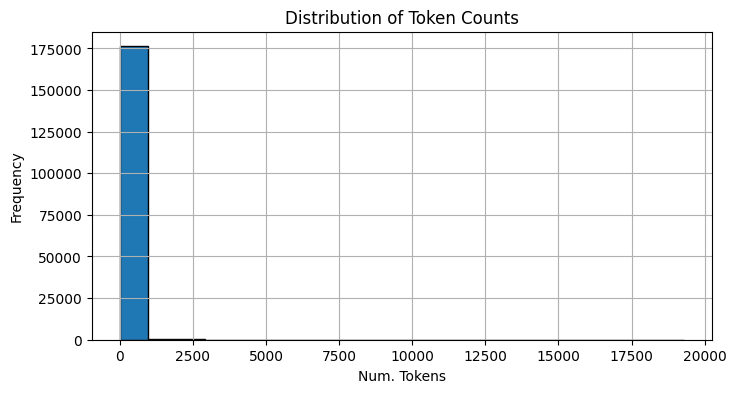

count    177152.000000
mean        117.236074
std         223.799193
min           9.000000
25%          39.000000
50%          71.000000
75%         140.000000
max       19284.000000
Name: token_count, dtype: float64

In [5]:
df["token_count"] = df["text"].apply(lambda t: len(word_tokenize(t)))

plt.figure(figsize=(8,4))
df["token_count"].hist(bins=20, edgecolor='black')
plt.title("Distribution of Token Counts")
plt.xlabel("Num. Tokens")
plt.ylabel("Frequency")
plt.show()

df["token_count"].describe()

### Cell 4.2: Word Cloud

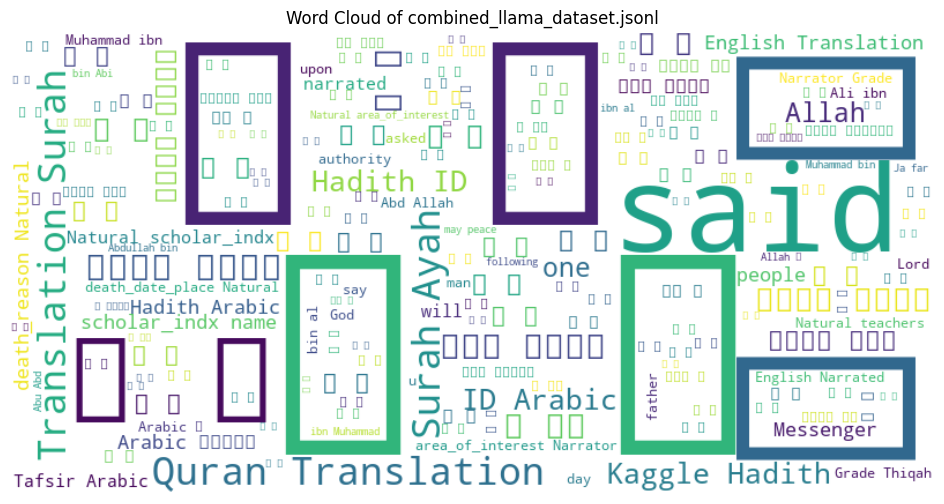

In [6]:
from wordcloud import WordCloud

combined_text = " ".join(df["text"].tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(combined_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of combined_llama_dataset.jsonl")
plt.show()

### Cell 4.3: Frequent Bigrams/Trigrams

In [7]:
from collections import Counter
import re

def basic_tokenize(text):
    tokens = word_tokenize(text.lower())
    # remove punctuation and short tokens
    tokens = [re.sub(r'[^\w\s]', '', t) for t in tokens if len(t) > 1]
    tokens = [t for t in tokens if t.isalpha()]
    return tokens

all_tokens = []
for tx in df["text"]:
    all_tokens.extend(basic_tokenize(tx))

# Bigrams
bigrams = list(zip(all_tokens, all_tokens[1:]))
bigram_freq = Counter(bigrams).most_common(10)

# Trigrams
trigrams = list(zip(all_tokens, all_tokens[1:], all_tokens[2:]))
trigram_freq = Counter(trigrams).most_common(10)

print("Top 10 Bigrams:")
for bg, freq in bigram_freq:
    print(bg, freq)

print("\nTop 10 Trigrams:")
for tg, freq in trigram_freq:
    print(tg, freq)

Top 10 Bigrams:
('of', 'the') 68852
('الله', 'عليه') 62874
('quran', 'translation') 59289
('translation', 'surah') 59289
('surah', 'ayah') 59289
('صلى', 'الله') 53609
('عليه', 'وسلم') 45556
('عبد', 'الله') 40255
('of', 'allah') 40163
('رسول', 'الله') 39624

Top 10 Trigrams:
('quran', 'translation', 'surah') 59289
('translation', 'surah', 'ayah') 59289
('صلى', 'الله', 'عليه') 53424
('الله', 'عليه', 'وسلم') 45548
('kaggle', 'hadith', 'id') 34441
('hadith', 'id', 'arabic') 34441
('الله', 'صلى', 'الله') 33048
('رسول', 'الله', 'صلى') 31778
('messenger', 'of', 'allah') 25629
('id', 'arabic', 'حدثنا') 23250


### Cell 4.4: t-SNE Visualization

C:\Users\MSI\AppData\Local\Temp\ipykernel_2840\3935665678.py:11: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embed_model_small = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-MiniLM-L6-v2")


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

d:\Project\Training\Tro1\.venv\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\MSI\.cache\huggingface\hub\models--sentence-transformers--paraphrase-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

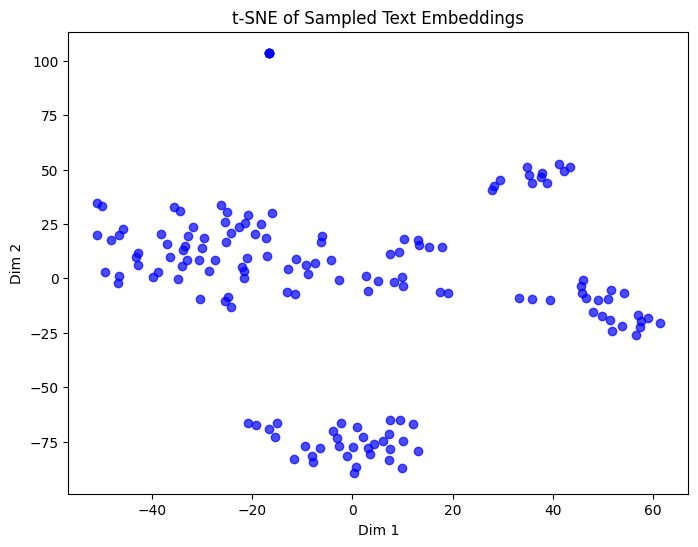

In [8]:
import numpy as np
from sklearn.manifold import TSNE

# For large datasets, sample to avoid computational overhead
SAMPLE_SIZE = 150
df_sample = df.sample(min(SAMPLE_SIZE, len(df)), random_state=42)
texts_sample = df_sample["text"].tolist()

# We'll embed using a smaller or specialized model to speed up demonstration
from langchain.embeddings import HuggingFaceEmbeddings
embed_model_small = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-MiniLM-L6-v2")

# Create embeddings
sample_embeddings = embed_model_small.embed_documents(texts_sample)
sample_embeddings = np.array(sample_embeddings)

# Use t-SNE to reduce to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
emb_2d = tsne.fit_transform(sample_embeddings)

plt.figure(figsize=(8,6))
plt.scatter(emb_2d[:,0], emb_2d[:,1], alpha=0.7, c='blue')
plt.title("t-SNE of Sampled Text Embeddings")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()

## Cell 5: Advanced Chunking with SpaCy Sentence Splitting

In [9]:
import spacy
from langchain.docstore.document import Document
from tqdm import tqdm

# For English or multilingual
try:
    # If your text is mostly English:
    nlp = spacy.load("en_core_web_sm")
except:
    # If your text is mostly Arabic or multi-lingual, you might use "xx_ent_wiki_sm" as a fallback
    nlp = spacy.load("xx_ent_wiki_sm")

MAX_CHARS = 500
CHUNK_OVERLAP_CHARS = 50

def spacy_sentence_split(text):
    """
    Splits text into sentences using spaCy, then merges them into ~500-char chunks.
    """
    doc = nlp(text)
    sentences = [sent.text.strip() for sent in doc.sents if sent.text.strip()]
    
    chunks = []
    current_chunk = ""
    
    for sent in sentences:
        if len(current_chunk) + len(sent) <= MAX_CHARS:
            # add sentence to current chunk
            if current_chunk == "":
                current_chunk = sent
            else:
                current_chunk += " " + sent
        else:
            # store the current chunk and start a new one
            chunks.append(current_chunk)
            current_chunk = sent
    # add the last chunk if it exists
    if current_chunk:
        chunks.append(current_chunk)
        
    # optionally add overlap
    final_chunks = []
    for c in chunks:
        if not final_chunks:
            final_chunks.append(c)
        else:
            # Overlap: take the last CHUNK_OVERLAP_CHARS of the previous chunk
            overlap_text = final_chunks[-1][-CHUNK_OVERLAP_CHARS:]
            new_chunk = overlap_text + " " + c if overlap_text else c
            final_chunks.append(new_chunk.strip())
    return final_chunks

docs = []
for text in tqdm(df["text"], desc="Chunking with SpaCy"):
    chunk_list = spacy_sentence_split(text)
    for chunk in chunk_list:
        docs.append(Document(page_content=chunk, metadata={}))

print(f"Total docs after advanced chunking: {len(docs)}")

Chunking with SpaCy: 100%|██████████| 177152/177152 [48:52<00:00, 60.41it/s]  

Total docs after advanced chunking: 315657


## Cell 6: Advanced Embeddings & Cross-Encoder Re-Ranking

We’ll use a **two-stage retrieval approach** to improve search accuracy:

#### Stage A: Approximate Similarity Search  
- Utilize a **bi-encoder** such as `intfloat/multilingual-e5-base` or **LaBSE**.  
- This helps quickly retrieve the most relevant candidates based on embeddings.

#### Stage B: Cross-Encoder Re-Ranking  
- The top candidates from Stage A are **re-ranked** using a **Cross-Encoder** model.  
- This model scores **query-document pairs** with greater precision, yielding **higher accuracy** in the final retrieval.

---

### Cell 6.1: Create Vector Store with a Bi-Encoder  

In this step, we will:
1. **Initialize a bi-encoder** model.
2. **Embed documents into a vector space** for efficient similarity search.
3. **Store embeddings** in a scalable vector database.

In [10]:
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma

# ADVANCED: Use "intfloat/multilingual-e5-base" for better multilingual coverage
bi_encoder = HuggingFaceEmbeddings(model_name="intfloat/multilingual-e5-base")

PERSIST_DIR = "./chroma_db_islamic_text"
os.makedirs(PERSIST_DIR, exist_ok=True)

vectorstore = Chroma.from_documents(
    documents=docs,
    embedding=bi_encoder,
    persist_directory=PERSIST_DIR
)
vectorstore.persist()

print("Chroma store created with advanced bi-encoder embeddings.")

modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

d:\Project\Training\Tro1\.venv\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\MSI\.cache\huggingface\hub\models--intfloat--multilingual-e5-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


README.md:   0%|          | 0.00/179k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

Chroma store created with advanced bi-encoder embeddings.


C:\Users\MSI\AppData\Local\Temp\ipykernel_2840\2833251877.py:15: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vectorstore.persist()


# Advanced RAG System with Hybrid Retrieval + Groq

## 2) Imports


In [1]:
import os
import tempfile
import shutil
from typing import List, Any, ClassVar, Optional

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

from langchain.schema import BaseRetriever, Document
from langchain.vectorstores import Chroma
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.chains import RetrievalQA
from langchain.llms.base import LLM

# Groq LLM client
from groq import Groq  # pip install groq

## 3) Additional Imports for Hybrid Retrieval (BM25 + NLTK)

In [2]:
try:
    from rank_bm25 import BM25Okapi
    import nltk
    nltk.download('punkt', quiet=True)
    from nltk.tokenize import word_tokenize
    BM25_ENABLED = True
except ImportError:
    BM25_ENABLED = False
    print("[WARNING] 'rank_bm25' and/or 'nltk' not installed. Hybrid Retrieval won't work.")


## 4) Conversation Memory
Stores past user queries and system responses for multi-turn conversation.

In [3]:
class ConversationMemory:
    """
    Stores past user queries and system responses for multi-turn conversation.
    """
    def __init__(self):
        self.conversation_history = []

    def add_to_history(self, user_query: str, response: str):
        """
        Add a single turn to memory.
        """
        self.conversation_history.append({
            "user": user_query,
            "assistant": response
        })

    def get_context_as_text(self) -> str:
        """
        Returns the entire conversation as a text block for prompt context.
        """
        context_str = []
        for turn in self.conversation_history:
            context_str.append(f"User: {turn['user']}\nAssistant: {turn['assistant']}\n")
        return "\n".join(context_str)

## 5) Hybrid Retriever (Optional: BM25 + Chroma)

In [4]:
class HybridRetriever:
    """
    Demonstrates a hybrid approach: BM25 lexical + Chroma vector search.
    """
    def __init__(self, chroma_vectorstore: Chroma, documents: Optional[List[str]] = None):
        """
        :param chroma_vectorstore: An existing Chroma vector store.
        :param documents: (Optional) A list of raw doc texts for BM25. 
                          Only needed if you want lexical retrieval in addition to vector.
        """
        self.vectorstore = chroma_vectorstore
        self.bm25_enabled = False

        if documents and BM25_ENABLED:
            self.bm25_enabled = True
            tokenized_docs = [word_tokenize(doc) for doc in documents]
            self.bm25 = BM25Okapi(tokenized_docs)
            self.documents = documents

    def hybrid_search(self, query: str, top_k: int = 5) -> List[str]:
        """
        1) Vector search from Chroma
        2) If BM25 is enabled, also do lexical search
        3) Merge results, remove duplicates, return top_k
        """
        # Vector-based retrieval
        vector_hits = self.vectorstore.similarity_search(query, k=top_k)
        vector_docs = [hit.page_content for hit in vector_hits]

        if not self.bm25_enabled:
            # If BM25 not set, just return vector results
            return vector_docs

        # BM25 lexical retrieval
        bm25_scores = self.bm25.get_scores(word_tokenize(query))
        scored_pairs = list(zip(self.documents, bm25_scores))
        scored_pairs.sort(key=lambda x: x[1], reverse=True)
        bm25_docs = [sp[0] for sp in scored_pairs[:top_k]]

        # Combine & deduplicate
        combined = []
        seen = set()
        for doc in bm25_docs + vector_docs:
            if doc not in seen:
                seen.add(doc)
                combined.append(doc)

        return combined[:top_k]

## 6) Multi-step Retriever (Query Expansion)

In [5]:
class MultiStepRetriever:
    """
    Simple example: if 'hadith' appears in the query, we expand with 'sunnah', etc.
    Then we do a hybrid search (BM25 + vector), or fallback to just vector if BM25 not enabled.
    """
    def __init__(self, hybrid_retriever: HybridRetriever):
        self.hybrid_retriever = hybrid_retriever

    def multi_step_search(self, query: str, top_k: int = 5) -> List[str]:
        expansions = []
        if "hadith" in query.lower():
            expansions.append("sunnah")

        if expansions:
            query_expanded = f"{query} {' '.join(expansions)}"
        else:
            query_expanded = query

        # Now call the hybrid search
        return self.hybrid_retriever.hybrid_search(query_expanded, top_k=top_k)

## 7) Augmentation Module

In [6]:
class AugmentationModule:
    """
    Filters or structures retrieved texts before final generation.
    """
    @staticmethod
    def augment(doc_texts: List[str]) -> List[str]:
        """
        Example: remove duplicates, do minimal cleaning.
        """
        unique_texts = []
        seen = set()
        for text in doc_texts:
            cleaned = text.strip()
            if cleaned not in seen:
                seen.add(cleaned)
                unique_texts.append(cleaned)
        return unique_texts


## 8) Prompt Engineering

In [7]:
class PromptEngineer:
    """
    Combines conversation memory, relevant docs, and user query into one final prompt.
    """
    @staticmethod
    def build_prompt(user_query: str, conversation_context: str, relevant_docs: List[str]) -> str:
        prompt_parts = []

        if conversation_context:
            prompt_parts.append(f"Conversation Context:\n{conversation_context}")

        if relevant_docs:
            docs_str = "\n\n".join(f"Document:\n{doc}" for doc in relevant_docs)
            prompt_parts.append(f"Relevant Documents:\n{docs_str}")

        prompt_parts.append(f"User Query:\n{user_query}")
        prompt_parts.append("Provide a detailed answer, referencing the documents above as needed.")

        return "\n\n".join(prompt_parts)

## 9) CrossEncoderReranker (from your original code)

In [8]:
class CrossEncoderReranker:
    """
    Custom cross-encoder reranker that:
      - Takes a query + retrieved documents,
      - Scores each document using a cross-encoder,
      - Returns the top K documents.
    """
    def __init__(self, model_name="cross-encoder/ms-marco-MiniLM-L-6-v2", device=None):
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModelForSequenceClassification.from_pretrained(model_name)
        self.model.eval()
        self.device = (
            torch.device("cuda" if torch.cuda.is_available() else "cpu")
            if device is None
            else torch.device(device)
        )
        self.model.to(self.device)

    def rerank(self, query: str, docs: list, top_k=3):
        inputs = []
        for d in docs:
            # If it's a LangChain Document, use `.page_content`
            doc_text = d.page_content if hasattr(d, "page_content") else d
            inputs.append((query, doc_text))

        encoded = self.tokenizer(
            [q for q, _ in inputs],
            [d for _, d in inputs],
            padding=True,
            truncation=True,
            return_tensors='pt'
        ).to(self.device)

        with torch.no_grad():
            outputs = self.model(**encoded)
            scores = outputs.logits.squeeze(-1)

        scored_docs = sorted(zip(docs, scores), key=lambda x: x[1], reverse=True)
        top_docs = [doc for doc, _score in scored_docs[:top_k]]
        return top_docs

## 10) AdvancedRetriever (two-stage: vector search + cross-encoder re-rank)


In [9]:
class AdvancedRetriever(BaseRetriever):
    """
    A custom two-stage retriever that:
      1) Performs approximate vector search (top_n).
      2) Re-ranks the results via a cross-encoder (final_k docs).
    """
    class Config:
        extra = 'allow'  # Use literal value as recommended in Pydantic V2

    vector_store: Any
    reranker: Any
    top_n: int = 10
    final_k: int = 2

    def _get_relevant_documents(self, query: str) -> List[Document]:
        initial_docs = self.vector_store.similarity_search(query, k=self.top_n)
        top_docs = self.reranker.rerank(query, initial_docs, top_k=self.final_k)
        return top_docs

    async def _aget_relevant_documents(self, query: str) -> List[Document]:
        # Same as above, but async
        initial_docs = self.vector_store.similarity_search(query, k=self.top_n)
        top_docs = self.reranker.rerank(query, initial_docs, top_k=self.final_k)
        return top_docs

## 11) GroqLLM (from your original code)


In [10]:
class GroqLLM(LLM):
    """
    Custom LLM wrapper to integrate with Groq's API.
    """
    client: ClassVar[Any] = None  # Marked as ClassVar so it's not treated as a field
    model: str = None

    class Config:
        extra = 'allow'

    def __init__(self, model: str, api_key: str, **kwargs):
        super().__init__(**kwargs)
        self.__class__.client = Groq(api_key=api_key)
        self.model = model

    @property
    def _llm_type(self) -> str:
        return "groq"

    def _call(self, prompt: str, stop: List[str] = None) -> str:
        messages = [{"role": "user", "content": prompt}]
        response = self.__class__.client.chat.completions.create(
            messages=messages,
            model=self.model
        )
        return response.choices[0].message.content

    def get_num_tokens(self, text: str) -> int:
        return len(text.split())

## 12) Main Execution
Demonstrates:
- (A) Using the `AdvancedRetriever` + `RetrievalQA` chain (LangChain style).
- (B) A custom pipeline with memory, multi-step retrieval, augmentation, re-ranking, and Groq LLM.


In [11]:
def main():
    """
    Demonstrates two approaches:

    (A) Using your existing "AdvancedRetriever" + "RetrievalQA" chain from LangChain.
    (B) A fully custom pipeline:
        - Conversation Memory
        - Hybrid or Vector-based multi-step retrieval
        - Cross-encoder re-rank (optional)
        - Augmentation
        - Prompt Engineering
        - Groq LLM for final generation
    """
    # -------------------------------------------------------------------------
    # (A) ORIGINAL CODE: Load Chroma DB & Build a RetrievalQA chain
    # -------------------------------------------------------------------------
    CHROMA_DIR = "./chroma_db_islamic_text"  # Adjust as needed
    if not os.path.exists(CHROMA_DIR):
        raise FileNotFoundError(f"Could not find Chroma DB directory: {CHROMA_DIR}")

    # Recreate the same embedding function used during Chroma DB creation.
    embed_model = HuggingFaceEmbeddings(model_name="sentence-transformers/LaBSE")

    # Load the existing Chroma DB
    vectorstore = Chroma(
        persist_directory=CHROMA_DIR,
        embedding_function=embed_model
    )

    # Cross-encoder re-ranker
    cross_encoder_model = "cross-encoder/ms-marco-MiniLM-L-6-v2"
    reranker = CrossEncoderReranker(model_name=cross_encoder_model)

    # Advanced Retriever using the loaded vectorstore
    adv_retriever = AdvancedRetriever(
        vector_store=vectorstore,
        reranker=reranker,
        top_n=8,   # Retrieve top 8 from vector store
        final_k=2  # Re-rank to final 2 documents
    )

    # Instantiate the Groq LLM
    GROQ_API_KEY = "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"  # Replace with your actual key
    GROQ_MODEL_NAME = "llama-3.3-70b-versatile"  # Example model name; adjust as needed
    groq_llm = GroqLLM(model=GROQ_MODEL_NAME, api_key=GROQ_API_KEY)

    # Build a standard RetrievalQA chain
    qa_chain = RetrievalQA.from_chain_type(
        llm=groq_llm,
        chain_type="stuff",
        retriever=adv_retriever,
        verbose=True
    )

    # First Query (original style)
    query = (
        "I want to know if there's any hadith discussing the prayer or salah, "
        "and if there's a relevant Quranic verse, reference it. "
        "Avoid saying 'I don't know.' Provide an explanatory answer with increased length."
    )
    print("User Query:", query)
    answer = qa_chain.run(query)
    print("\nFinal Answer (via RetrievalQA):\n", answer)

    # -------------------------------------------------------------------------
    # (B) CUSTOM PIPELINE: Multi-step retrieval, augmentation, memory, prompt
    # -------------------------------------------------------------------------
    print("\n" + "="*70)
    print("B) CUSTOM PIPELINE EXAMPLE\n" + "="*70)

    # 1) Conversation memory
    memory = ConversationMemory()

    # 2) Hybrid Retriever:
    #    If you want to use lexical + vector, we need the original text docs.
    #    If you don't have them, you can store them in the Chroma DB or externally.
    #    We'll do a placeholder for 'documents' to illustrate.
    documents = []  # e.g., [doc.page_content for doc in vectorstore.search("all docs")]
    hybrid_retriever = HybridRetriever(chroma_vectorstore=vectorstore, documents=documents)
    multi_step_retriever = MultiStepRetriever(hybrid_retriever)
    augmentation_module = AugmentationModule()

    # 3) We'll re-use the CrossEncoderReranker if we want to re-rank results
    #    after the multi-step retrieval.

    # 4) We'll do a custom user query, store it in memory, etc.
    user_query_1 = "Could you tell me about prayer (salah) references from hadith or Quran?"
    conversation_context = memory.get_context_as_text()

    # (i) Multi-step retrieval
    multi_step_docs_1 = multi_step_retriever.multi_step_search(user_query_1, top_k=5)

    # (ii) Augment/clean
    augmented_docs_1 = augmentation_module.augment(multi_step_docs_1)

    # (iii) (Optional) Cross-encoder re-rank
    re_ranked_docs_1 = reranker.rerank(user_query_1, augmented_docs_1, top_k=3)

    # Convert them back to strings if needed
    if all(isinstance(d, str) for d in re_ranked_docs_1):
        final_docs_1 = re_ranked_docs_1
    else:
        final_docs_1 = [d.page_content for d in re_ranked_docs_1]

    # (iv) Prompt engineering
    prompt_1 = PromptEngineer.build_prompt(
        user_query=user_query_1,
        conversation_context=conversation_context,
        relevant_docs=final_docs_1
    )

    # (v) Generate with Groq
    custom_answer_1 = groq_llm(prompt_1)
    print("\nCustom Pipeline - Answer #1:\n", custom_answer_1)

    # (vi) Add to memory
    memory.add_to_history(user_query_1, custom_answer_1)

    # 5) Second query with memory
    user_query_2 = "What about traveling? Can I shorten the prayer? Please reference hadith if available."
    conversation_context_2 = memory.get_context_as_text()

    multi_step_docs_2 = multi_step_retriever.multi_step_search(user_query_2, top_k=5)
    augmented_docs_2 = augmentation_module.augment(multi_step_docs_2)
    re_ranked_docs_2 = reranker.rerank(user_query_2, augmented_docs_2, top_k=3)

    if all(isinstance(d, str) for d in re_ranked_docs_2):
        final_docs_2 = re_ranked_docs_2
    else:
        final_docs_2 = [d.page_content for d in re_ranked_docs_2]

    prompt_2 = PromptEngineer.build_prompt(
        user_query=user_query_2,
        conversation_context=conversation_context_2,
        relevant_docs=final_docs_2
    )

    custom_answer_2 = groq_llm(prompt_2)
    print("\nCustom Pipeline - Answer #2:\n", custom_answer_2)
    memory.add_to_history(user_query_2, custom_answer_2)

In [12]:
if __name__ == "__main__":
    main()

C:\Users\MSI\AppData\Local\Temp\ipykernel_15120\321867812.py:22: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embed_model = HuggingFaceEmbeddings(model_name="sentence-transformers/LaBSE")
C:\Users\MSI\AppData\Local\Temp\ipykernel_15120\321867812.py:25: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(


User Query: I want to know if there's any hadith discussing the prayer or salah, and if there's a relevant Quranic verse, reference it. Avoid saying 'I don't know.' Provide an explanatory answer with increased length.


> Entering new RetrievalQA chain...


C:\Users\MSI\AppData\Local\Temp\ipykernel_15120\321867812.py:62: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  answer = qa_chain.run(query)



> Finished chain.

Final Answer (via RetrievalQA):
 The context provided revolves around biographical details of individuals, specifically al-Hamdani and al-Wada'i, with information on their birth and death dates, places, and reasons. However, it doesn't directly offer information on hadiths related to prayer (salah) or relevant Quranic verses.

Salah is one of the five pillars of Islam and is a fundamental aspect of the faith, emphasizing the importance of prayer in a Muslim's daily life. In Islamic theology, the act of prayer is considered a direct link between the believer and Allah, requiring both physical and mental devotion. The Quran and hadith are filled with references to prayer, emphasizing its significance and providing guidance on how it should be performed.

One of the most relevant Quranic verses concerning prayer is found in Surah Al-Baqarah, verse 43: "And establish prayer and give zakah and bow with those who bow [in worship and obedience to Allah]." This verse not on

C:\Users\MSI\AppData\Local\Temp\ipykernel_15120\321867812.py:113: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  custom_answer_1 = groq_llm(prompt_1)



Custom Pipeline - Answer #1:
 Prayer, or salah, is a fundamental aspect of Islamic worship and is frequently referenced in both the Quran and Hadith. Unfortunately, the provided documents do not directly address the topic of prayer. However, I can provide a general overview of the importance of prayer in Islam and reference relevant Quranic verses and Hadith.

In Islam, prayer is considered one of the five pillars of the faith, and it is obligatory for Muslims to perform five daily prayers. The Quran emphasizes the importance of prayer in several verses, such as Surah 2:153, which states, "O you who believe! Seek help in patience and prayer; surely prayer is a mighty affair." This verse highlights the significance of prayer in seeking guidance and comfort from Allah.

The concept of worship, which includes prayer, is also mentioned in the provided Document 1. It states that "worship of God" implies a sense of responsibility before Him, and that the commandment to worship God comprises

## ## Code for feature use

In [1]:
import os
import tempfile
import shutil
from typing import List, Any, ClassVar, Optional

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from langchain.schema import BaseRetriever, Document
from langchain.vectorstores import Chroma
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.chains import RetrievalQA
from langchain.llms.base import LLM
from groq import Groq  # pip install groq

###############################################################################
# 0. Additional Imports for Hybrid Retrieval (BM25)
###############################################################################
try:
    from rank_bm25 import BM25Okapi
    import nltk
    nltk.download('punkt', quiet=True)
    from nltk.tokenize import word_tokenize
    BM25_ENABLED = True
except ImportError:
    BM25_ENABLED = False
    print("[WARNING] 'rank_bm25' and/or 'nltk' not installed. Hybrid Retrieval won't work.")


###############################################################################
# 1. Conversation Memory
###############################################################################

class ConversationMemory:
    """
    Stores past user queries and system responses for multi-turn conversation.
    """
    def __init__(self):
        self.conversation_history = []

    def add_to_history(self, user_query: str, response: str):
        """
        Add a single turn to memory.
        """
        self.conversation_history.append({
            "user": user_query,
            "assistant": response
        })

    def get_context_as_text(self) -> str:
        """
        Returns the entire conversation as a text block for prompt context.
        """
        context_str = []
        for turn in self.conversation_history:
            context_str.append(f"User: {turn['user']}\nAssistant: {turn['assistant']}\n")
        return "\n".join(context_str)


###############################################################################
# 2. (Optional) Hybrid Retriever (Chroma + BM25)
###############################################################################

class HybridRetriever:
    """
    Demonstrates a hybrid approach: BM25 lexical + Chroma vector search.
    """
    def __init__(self, chroma_vectorstore: Chroma, documents: Optional[List[str]] = None):
        """
        :param chroma_vectorstore: An existing Chroma vector store.
        :param documents: (Optional) A list of raw doc texts for BM25. 
                          Only needed if you want lexical retrieval in addition to vector.
        """
        self.vectorstore = chroma_vectorstore
        self.bm25_enabled = False

        # If documents are provided and rank_bm25 is installed,
        # set up BM25 for lexical retrieval
        if documents and BM25_ENABLED:
            self.bm25_enabled = True
            tokenized_docs = [word_tokenize(doc) for doc in documents]
            self.bm25 = BM25Okapi(tokenized_docs)
            self.documents = documents

    def hybrid_search(self, query: str, top_k: int = 5) -> List[str]:
        """
        1) Vector search from Chroma
        2) If BM25 is enabled, also do lexical search
        3) Merge results, remove duplicates, return top_k
        """
        # Vector-based retrieval
        vector_hits = self.vectorstore.similarity_search(query, k=top_k)
        vector_docs = [hit.page_content for hit in vector_hits]

        if not self.bm25_enabled:
            # If BM25 not set, just return vector results
            return vector_docs

        # BM25 lexical retrieval
        bm25_scores = self.bm25.get_scores(word_tokenize(query))
        scored_pairs = list(zip(self.documents, bm25_scores))
        # Sort by score desc
        scored_pairs.sort(key=lambda x: x[1], reverse=True)
        # Take top_k from BM25
        bm25_docs = [sp[0] for sp in scored_pairs[:top_k]]

        # Combine & deduplicate
        combined = []
        seen = set()
        for doc in bm25_docs + vector_docs:
            if doc not in seen:
                seen.add(doc)
                combined.append(doc)

        # Return top_k from the combined
        return combined[:top_k]


###############################################################################
# 3. Multi-step Retrieval (e.g. query expansion)
###############################################################################

class MultiStepRetriever:
    """
    Simple example: if 'hadith' appears in the query, we expand with 'sunnah', etc.
    Then we do a hybrid search (BM25 + vector), or fallback to just vector if BM25 not enabled.
    """
    def __init__(self, hybrid_retriever: HybridRetriever):
        self.hybrid_retriever = hybrid_retriever

    def multi_step_search(self, query: str, top_k: int = 5) -> List[str]:
        expansions = []
        if "hadith" in query.lower():
            expansions.append("sunnah")

        if expansions:
            query_expanded = f"{query} {' '.join(expansions)}"
        else:
            query_expanded = query

        # Now call the hybrid search
        return self.hybrid_retriever.hybrid_search(query_expanded, top_k=top_k)


###############################################################################
# 4. Augmentation Module
###############################################################################

class AugmentationModule:
    """
    Filters or structures retrieved texts before final generation.
    """
    @staticmethod
    def augment(doc_texts: List[str]) -> List[str]:
        """
        Example: remove duplicates, do minimal cleaning.
        """
        unique_texts = []
        seen = set()
        for text in doc_texts:
            cleaned = text.strip()
            if cleaned not in seen:
                seen.add(cleaned)
                unique_texts.append(cleaned)
        return unique_texts


###############################################################################
# 5. Prompt Engineering
###############################################################################

class PromptEngineer:
    """
    Combines conversation memory, relevant docs, and user query into one final prompt.
    """
    @staticmethod
    def build_prompt(user_query: str, conversation_context: str, relevant_docs: List[str]) -> str:
        prompt_parts = []

        if conversation_context:
            prompt_parts.append(f"Conversation Context:\n{conversation_context}")

        if relevant_docs:
            docs_str = "\n\n".join(f"Document:\n{doc}" for doc in relevant_docs)
            prompt_parts.append(f"Relevant Documents:\n{docs_str}")

        prompt_parts.append(f"User Query:\n{user_query}")
        prompt_parts.append("Provide a detailed answer, referencing the documents above as needed.")

        return "\n\n".join(prompt_parts)


###############################################################################
# 6. CrossEncoderReranker (from your original code)
###############################################################################

class CrossEncoderReranker:
    """
    Custom cross-encoder reranker that:
      - Takes a query + retrieved documents,
      - Scores each document using a cross-encoder,
      - Returns the top K documents.
    """
    def __init__(self, model_name="cross-encoder/ms-marco-MiniLM-L-6-v2", device=None):
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModelForSequenceClassification.from_pretrained(model_name)
        self.model.eval()
        self.device = (
            torch.device("cuda" if torch.cuda.is_available() else "cpu")
            if device is None
            else torch.device(device)
        )
        self.model.to(self.device)

    def rerank(self, query: str, docs: list, top_k=3):
        inputs = []
        for d in docs:
            # If it's a LangChain Document, use `.page_content`
            doc_text = d.page_content if hasattr(d, "page_content") else d
            inputs.append((query, doc_text))

        encoded = self.tokenizer(
            [q for q, _ in inputs],
            [d for _, d in inputs],
            padding=True,
            truncation=True,
            return_tensors='pt'
        ).to(self.device)

        with torch.no_grad():
            outputs = self.model(**encoded)
            scores = outputs.logits.squeeze(-1)

        scored_docs = sorted(zip(docs, scores), key=lambda x: x[1], reverse=True)
        top_docs = [doc for doc, _score in scored_docs[:top_k]]
        return top_docs


###############################################################################
# 7. AdvancedRetriever (from your original code)
###############################################################################

class AdvancedRetriever(BaseRetriever):
    """
    A custom two-stage retriever that:
      1) Performs approximate vector search (top_n).
      2) Re-ranks the results via a cross-encoder (final_k docs).
    """
    class Config:
        extra = 'allow'  # Use literal value as recommended in Pydantic V2

    vector_store: Any
    reranker: Any
    top_n: int = 10
    final_k: int = 2

    def _get_relevant_documents(self, query: str) -> List[Document]:
        initial_docs = self.vector_store.similarity_search(query, k=self.top_n)
        top_docs = self.reranker.rerank(query, initial_docs, top_k=self.final_k)
        return top_docs

    async def _aget_relevant_documents(self, query: str) -> List[Document]:
        # Same as above, but async
        initial_docs = self.vector_store.similarity_search(query, k=self.top_n)
        top_docs = self.reranker.rerank(query, initial_docs, top_k=self.final_k)
        return top_docs


###############################################################################
# 8. GroqLLM (from your original code)
###############################################################################

class GroqLLM(LLM):
    """
    Custom LLM wrapper to integrate with Groq's API.
    """
    client: ClassVar[Any] = None  # Marked as ClassVar so it's not treated as a field
    model: str = None

    class Config:
        extra = 'allow'

    def __init__(self, model: str, api_key: str, **kwargs):
        super().__init__(**kwargs)
        self.__class__.client = Groq(api_key=api_key)
        self.model = model

    @property
    def _llm_type(self) -> str:
        return "groq"

    def _call(self, prompt: str, stop: List[str] = None) -> str:
        messages = [{"role": "user", "content": prompt}]
        response = self.__class__.client.chat.completions.create(
            messages=messages,
            model=self.model
        )
        return response.choices[0].message.content

    def get_num_tokens(self, text: str) -> int:
        return len(text.split())


###############################################################################
# 9. Main Execution
###############################################################################

def main():
    """
    Demonstrates two approaches:

    (A) Using your existing "AdvancedRetriever" + "RetrievalQA" chain from LangChain.
    (B) A fully custom pipeline:
        - Conversation Memory
        - Hybrid or Vector-based multi-step retrieval
        - Cross-encoder re-rank (optional)
        - Augmentation
        - Prompt Engineering
        - Groq LLM for final generation
    """
    # -------------------------------------------------------------------------
    # (A) ORIGINAL CODE: Load Chroma DB & Build a RetrievalQA chain
    # -------------------------------------------------------------------------
    CHROMA_DIR = "./chroma_db_islamic_text"  # Adjust as needed
    if not os.path.exists(CHROMA_DIR):
        raise FileNotFoundError(f"Could not find Chroma DB directory: {CHROMA_DIR}")

    # Recreate the same embedding function used during Chroma DB creation.
    embed_model = HuggingFaceEmbeddings(model_name="sentence-transformers/LaBSE")

    # Load the existing Chroma DB
    vectorstore = Chroma(
        persist_directory=CHROMA_DIR,
        embedding_function=embed_model
    )

    # Cross-encoder re-ranker
    cross_encoder_model = "cross-encoder/ms-marco-MiniLM-L-6-v2"
    reranker = CrossEncoderReranker(model_name=cross_encoder_model)

    # Advanced Retriever using the loaded vectorstore
    adv_retriever = AdvancedRetriever(
        vector_store=vectorstore,
        reranker=reranker,
        top_n=8,   # Retrieve top 8 from vector store
        final_k=2  # Re-rank to final 2 documents
    )

    # Instantiate the Groq LLM
    GROQ_API_KEY = "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"  # Replace with your actual key
    GROQ_MODEL_NAME = "llama-3.3-70b-versatile"  # Example model name; adjust as needed
    groq_llm = GroqLLM(model=GROQ_MODEL_NAME, api_key=GROQ_API_KEY)

    # Build a standard RetrievalQA chain
    qa_chain = RetrievalQA.from_chain_type(
        llm=groq_llm,
        chain_type="stuff",
        retriever=adv_retriever,
        verbose=True
    )

    # First Query (original style)
    query = (
        "I want to know if there's any hadith discussing the prayer or salah, "
        "and if there's a relevant Quranic verse, reference it. "
        "Avoid saying 'I don't know.' Provide an explanatory answer with increased length."
    )
    print("User Query:", query)
    answer = qa_chain.run(query)
    print("\nFinal Answer (via RetrievalQA):\n", answer)

    # -------------------------------------------------------------------------
    # (B) CUSTOM PIPELINE: Multi-step retrieval, augmentation, memory, prompt
    # -------------------------------------------------------------------------
    print("\n" + "="*70)
    print("B) CUSTOM PIPELINE EXAMPLE\n" + "="*70)

    # 1) Conversation memory
    memory = ConversationMemory()

    # 2) Hybrid Retriever:
    #    If you want to use lexical + vector, we need the original text docs.
    #    If you don't have them, you can store them in the Chroma DB or externally.
    #    For demonstration, let's assume we have some raw texts in your DB
    #    or we can pass `documents=None` for vector-only if BM25 is not set up.
    #    We'll do a placeholder for 'documents' to illustrate.
    #    If you have a real list of doc_texts, pass them in.
    #    e.g.:
    # documents = [doc.page_content for doc in vectorstore.search("get all docs")]
    # But for now, let's skip or assume an empty list:
    documents = []

    hybrid_retriever = HybridRetriever(chroma_vectorstore=vectorstore, documents=documents)
    multi_step_retriever = MultiStepRetriever(hybrid_retriever)
    augmentation_module = AugmentationModule()

    # 3) We'll re-use the CrossEncoderReranker if we want to re-rank results
    #    after the multi-step retrieval.

    # 4) We'll do a custom user query, store it in memory, etc.
    user_query_1 = (
        "Could you tell me about prayer (salah) references from hadith or Quran?"
    )
    conversation_context = memory.get_context_as_text()

    # (i) Multi-step retrieval
    multi_step_docs_1 = multi_step_retriever.multi_step_search(user_query_1, top_k=5)

    # (ii) Augment/clean
    augmented_docs_1 = augmentation_module.augment(multi_step_docs_1)

    # (iii) (Optional) Cross-encoder re-rank
    #       The cross-encoder expects a list of Documents or strings, let's wrap them as strings for now
    #       For demonstration, we'll treat them as raw text. If you want a proper Document object, do so.
    re_ranked_docs_1 = reranker.rerank(user_query_1, augmented_docs_1, top_k=3)

    # Convert them back to strings if needed
    # (If re_ranked_docs_1 are strings, we can use them directly)
    if all(isinstance(d, str) for d in re_ranked_docs_1):
        final_docs_1 = re_ranked_docs_1
    else:
        # If they are Document objects, do something like:
        final_docs_1 = [d.page_content for d in re_ranked_docs_1]

    # (iv) Prompt engineering
    prompt_1 = PromptEngineer.build_prompt(
        user_query=user_query_1,
        conversation_context=conversation_context,
        relevant_docs=final_docs_1
    )

    # (v) Generate with Groq
    custom_answer_1 = groq_llm(prompt_1)
    print("\nCustom Pipeline - Answer #1:\n", custom_answer_1)

    # (vi) Add to memory
    memory.add_to_history(user_query_1, custom_answer_1)

    # 5) Second query with memory
    user_query_2 = (
        "What about traveling? Can I shorten the prayer? Please reference hadith if available."
    )
    conversation_context_2 = memory.get_context_as_text()

    multi_step_docs_2 = multi_step_retriever.multi_step_search(user_query_2, top_k=5)
    augmented_docs_2 = augmentation_module.augment(multi_step_docs_2)
    re_ranked_docs_2 = reranker.rerank(user_query_2, augmented_docs_2, top_k=3)

    if all(isinstance(d, str) for d in re_ranked_docs_2):
        final_docs_2 = re_ranked_docs_2
    else:
        final_docs_2 = [d.page_content for d in re_ranked_docs_2]

    prompt_2 = PromptEngineer.build_prompt(
        user_query=user_query_2,
        conversation_context=conversation_context_2,
        relevant_docs=final_docs_2
    )

    custom_answer_2 = groq_llm(prompt_2)
    print("\nCustom Pipeline - Answer #2:\n", custom_answer_2)
    memory.add_to_history(user_query_2, custom_answer_2)


if __name__ == "__main__":
    main()


C:\Users\MSI\AppData\Local\Temp\ipykernel_11952\1860246396.py:328: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embed_model = HuggingFaceEmbeddings(model_name="sentence-transformers/LaBSE")
C:\Users\MSI\AppData\Local\Temp\ipykernel_11952\1860246396.py:331: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(


User Query: I want to know if there's any hadith discussing the prayer or salah, and if there's a relevant Quranic verse, reference it. Avoid saying 'I don't know.' Provide an explanatory answer with increased length.


> Entering new RetrievalQA chain...


C:\Users\MSI\AppData\Local\Temp\ipykernel_11952\1860246396.py:368: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  answer = qa_chain.run(query)



> Finished chain.

Final Answer (via RetrievalQA):
 The context provided revolves around the biographical details of an individual, presumably a scholar or figure in Islamic history, given the mention of specific locations such as Hijaz and Kufa, and the reference to death in a Hijri year. However, to address the question about hadith discussing prayer or salah and relevant Quranic verses, we must delve into the broader Islamic religious texts.

In Islam, the prayer, or salah, is one of the five pillars of the faith, obligatory for all Muslims. It is a ritualistic act that involves specific movements and recitations, performed at specific times of the day. The importance and methodology of salah are extensively discussed in both the Quran and hadith.

The Quran provides the foundational guidance for the performance of salah. For example, the verse in Surah Al-Baqarah, verse 43, instructs believers to "Establish the prayer" as part of their devotion to God. Surah Al-An'am, verse 72, al

C:\Users\MSI\AppData\Local\Temp\ipykernel_11952\1860246396.py:432: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  custom_answer_1 = groq_llm(prompt_1)



Custom Pipeline - Answer #1:
 Prayer, or salah, is a fundamental aspect of Islamic worship and is referenced extensively in both the Quran and Hadith. Unfortunately, the provided documents do not contain explicit references to prayer. However, I can provide a general overview of the importance of prayer in Islam and reference the documents when discussing related concepts.

In Islamic terminology, the concept of worship (ibadah) encompasses a broad range of activities, including prayer, that demonstrate a person's sense of responsibility before God. As mentioned in the first document, "worship of God" implies man's sense of responsibility before Him, which is a central theme in the Quran. While this document does not specifically mention prayer, it highlights the importance of submitting to God's will and living a life of accountability, which is closely tied to the practice of prayer.

The second document appears to discuss marital relationships and the rights of spouses, which is no